In [47]:
import numpy as np
import pandas as pd
import math as mt
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

In [2]:
#covid = pd.read_csv("Covid_2020.csv")
df = pd.read_csv("/content/COTAHIST_A2015_2021.csv")
detail = pd.read_excel("/content/IPO_details.xlsx")

In [3]:
tickers = list(detail.Tickers)
abertura = list(detail.Preco_fixado)
dict_tickers = dict(zip(tickers, abertura))

In [70]:
dict_tickers['WIZS3']

12.33

In [4]:
ipos_2015 = df[(df['date'] >= '2015-01-01') & (df['date'] <= '2015-12-31')]
ipos_2016 = df[(df['date'] >= '2016-01-01') & (df['date'] <= '2016-12-31')]
ipos_2017 = df[(df['date'] >= '2017-01-01') & (df['date'] <= '2017-12-31')]
ipos_2018 = df[(df['date'] >= '2018-01-01') & (df['date'] <= '2018-12-31')]
ipos_2019 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-12-31')]
ipos_2020 = df[(df['date'] >= '2020-01-01') & (df['date'] <= '2020-12-31')]
ipos_2021 = df[(df['date'] >= '2021-01-01') & (df['date'] <= '2021-05-24')]

In [5]:
datedf = df["date"]
datedf.reset_index(drop = True)
datedf = datedf.drop_duplicates()

In [16]:
variation = df.copy()
variation

,date,codneg,preabe,preult
0,2015-06-05,WIZS3,13.60,13.90
1,2015-06-08,WIZS3,14.11,13.78
2,2015-06-09,WIZS3,13.78,13.65
3,2015-06-10,WIZS3,13.70,14.00
4,2015-06-11,WIZS3,14.01,14.26
...,...,...,...,...
22518,2021-06-09,TFCO4,13.45,13.45
22519,2021-06-09,VAMO3,52.41,51.96
22520,2021-06-09,VIVA3,31.37,31.66
22521,2021-06-09,WEST3,8.83,8.77


In [71]:
variation[variation.codneg=='BIDI4']

,date,codneg,preabe,preult,var,vol_media_diaria,vol_media_anual,indice
2928,2018-05-11,BIDI4,18.75,18.40,-0.018667,NaN,NaN,2928
2942,2018-05-14,BIDI4,18.54,18.45,-0.004854,0.009767,0.155043,2942
2956,2018-05-15,BIDI4,18.40,18.28,-0.006522,0.007539,0.119685,2956
2970,2018-05-16,BIDI4,18.31,18.40,0.004915,0.009676,0.153597,2970
2984,2018-05-17,BIDI4,18.40,18.39,-0.000543,0.008764,0.139117,2984
...,...,...,...,...,...,...,...,...
22185,2021-06-02,BIDI4,22.00,22.11,0.005000,0.038623,0.613119,22185
22254,2021-06-04,BIDI4,22.11,22.15,0.001809,0.038597,0.612714,22254
22323,2021-06-07,BIDI4,22.05,21.63,-0.019048,0.038579,0.612423,22323
22392,2021-06-08,BIDI4,21.75,21.04,-0.032644,0.038573,0.612332,22392


In [17]:
variation['var'] = variation.apply(lambda x: (x.preult - x.preabe)/x.preabe, axis = 1)

In [18]:
variation

,date,codneg,preabe,preult,var
0,2015-06-05,WIZS3,13.60,13.90,0.022059
1,2015-06-08,WIZS3,14.11,13.78,-0.023388
2,2015-06-09,WIZS3,13.78,13.65,-0.009434
3,2015-06-10,WIZS3,13.70,14.00,0.021898
4,2015-06-11,WIZS3,14.01,14.26,0.017844
...,...,...,...,...,...
22518,2021-06-09,TFCO4,13.45,13.45,0.000000
22519,2021-06-09,VAMO3,52.41,51.96,-0.008586
22520,2021-06-09,VIVA3,31.37,31.66,0.009245
22521,2021-06-09,WEST3,8.83,8.77,-0.006795


In [19]:
variation['vol_media_diaria'] = 0
variation['vol_media_anual'] = 0
variation

,date,codneg,preabe,preult,var,vol_media_diaria,vol_media_anual
0,2015-06-05,WIZS3,13.60,13.90,0.022059,0,0
1,2015-06-08,WIZS3,14.11,13.78,-0.023388,0,0
2,2015-06-09,WIZS3,13.78,13.65,-0.009434,0,0
3,2015-06-10,WIZS3,13.70,14.00,0.021898,0,0
4,2015-06-11,WIZS3,14.01,14.26,0.017844,0,0
...,...,...,...,...,...,...,...
22518,2021-06-09,TFCO4,13.45,13.45,0.000000,0,0
22519,2021-06-09,VAMO3,52.41,51.96,-0.008586,0,0
22520,2021-06-09,VIVA3,31.37,31.66,0.009245,0,0
22521,2021-06-09,WEST3,8.83,8.77,-0.006795,0,0


In [21]:
variation['indice'] = list(variation.index)
variation

,date,codneg,preabe,preult,var,vol_media_diaria,vol_media_anual,indice
0,2015-06-05,WIZS3,13.60,13.90,0.022059,0,0,0
1,2015-06-08,WIZS3,14.11,13.78,-0.023388,0,0,1
2,2015-06-09,WIZS3,13.78,13.65,-0.009434,0,0,2
3,2015-06-10,WIZS3,13.70,14.00,0.021898,0,0,3
4,2015-06-11,WIZS3,14.01,14.26,0.017844,0,0,4
...,...,...,...,...,...,...,...,...
22518,2021-06-09,TFCO4,13.45,13.45,0.000000,0,0,22518
22519,2021-06-09,VAMO3,52.41,51.96,-0.008586,0,0,22519
22520,2021-06-09,VIVA3,31.37,31.66,0.009245,0,0,22520
22521,2021-06-09,WEST3,8.83,8.77,-0.006795,0,0,22521


In [33]:
data = variation[:1].copy()
print(data)
ativo = 'WIZS3'
data = data[data.codneg==ativo]

abertura = dict_tickers[ativo]
vol = data['var']
vol

         date codneg  preabe  ...  vol_media_diaria  vol_media_anual  indice
0  2015-06-05  WIZS3    13.6  ...               NaN                0       0

[1 rows x 8 columns]


0    0.022059
Name: var, dtype: float64

In [38]:
def vol_ant(data, ativo):
    data = data[data.codneg == ativo]
    abertura = dict_tickers[ativo]

    if data.index.max() == 0:
        vol = np.array([data['var'][0], (data['preabe'][0] - abertura)/abertura]).std()  
        return vol
    else:
        vol = data['var'].std()
        return vol

In [39]:
variation['vol_media_diaria'] = variation.apply(lambda x: vol_ant(variation[:x['indice']+1],x.codneg ), axis = 1)
variation.drop(columns='indice')
variation['vol_media_anual'] = variation['vol_media_diaria']*(252**(1/2))
variation

,date,codneg,preabe,preult,var,vol_media_diaria,vol_media_anual,indice
0,2015-06-05,WIZS3,13.60,13.90,0.022059,0.040471,0.642457,0
1,2015-06-08,WIZS3,14.11,13.78,-0.023388,0.032136,0.510136,1
2,2015-06-09,WIZS3,13.78,13.65,-0.009434,0.023280,0.369566,2
3,2015-06-10,WIZS3,13.70,14.00,0.021898,0.022884,0.363279,3
4,2015-06-11,WIZS3,14.01,14.26,0.017844,0.020932,0.332281,4
...,...,...,...,...,...,...,...,...
22518,2021-06-09,TFCO4,13.45,13.45,0.000000,0.027733,0.440245,22518
22519,2021-06-09,VAMO3,52.41,51.96,-0.008586,0.026448,0.419845,22519
22520,2021-06-09,VIVA3,31.37,31.66,0.009245,0.039168,0.621774,22520
22521,2021-06-09,WEST3,8.83,8.77,-0.006795,0.039820,0.632130,22521


In [69]:
variation

,date,codneg,preabe,preult,var,vol_media_diaria,vol_media_anual,indice
0,2015-06-05,WIZS3,13.60,13.90,0.022059,0.040471,0.642457,0
1,2015-06-08,WIZS3,14.11,13.78,-0.023388,0.032136,0.510136,1
2,2015-06-09,WIZS3,13.78,13.65,-0.009434,0.023280,0.369566,2
3,2015-06-10,WIZS3,13.70,14.00,0.021898,0.022884,0.363279,3
4,2015-06-11,WIZS3,14.01,14.26,0.017844,0.020932,0.332281,4
5,2015-06-12,WIZS3,14.32,14.53,0.014665,0.019069,0.302708,5
6,2015-06-15,WIZS3,14.51,14.64,0.008959,0.017419,0.276518,6
7,2015-06-16,WIZS3,14.63,14.55,-0.005468,0.016767,0.266174,7
8,2015-06-17,WIZS3,14.61,14.25,-0.024641,0.018697,0.296809,8
9,2015-06-18,WIZS3,14.23,14.60,0.026001,0.019131,0.303687,9


In [40]:
ticker = 'WIZS3'
v_wiz = variation[variation.codneg==ticker].copy()
v_wiz['vol'] = 0
count = 0
abertura = dict_tickers[ticker]
for i in list(v_wiz.index):
    
    if i == 0:
        v_wiz.loc[i,'vol'] = np.array([v_wiz.loc[i,'vol'], (abertura - v_wiz.loc[i,'preabe'])/abertura ]).std()
        continue

    v_wiz.loc[i,'vol'] = v_wiz[:i+1]['var'].std()

v_wiz = v_wiz.rename(columns={'vol':'vol_media_diaria'})
v_wiz['vol_media_anual'] = v_wiz['vol_media_diaria']*(252**(1/2))

In [61]:
var_by_day = variation.pivot_table(values='vol_media_anual', index= 'date', columns='codneg')

In [62]:
var_by_day

codneg,AALR3,AERI3,ALLD3,ALPK3,AMBP3,AVLL3,AZUL4,BIDI4,BKBR3,BLAU3,BMGB4,BMOB3,BOAS3,BRDT3,CAML3,CASH3,CEAB3,CMIN3,CRFB3,CSED3,CURY3,CXSE3,DMVF3,ELMD3,ENJU3,ESPA3,GGPS3,GMAT3,GNDI3,HAPV3,HBRE3,HBSA3,INTB3,IRBR3,JALL3,LAVV3,LJQQ3,LWSA3,MATD3,MBLY3,MDNE3,MELK3,MODL11,MOSI3,MOVI3,MTRE3,NEOE3,NGRD3,OMGE3,OPCT3,ORVR3,PARD3,PETZ3,PGMN3,PLPL3,POWE3,PRNR3,RDOR3,RECV3,RRRP3,SBFG3,SEQL3,SOJA3,SOMA3,TFCO4,VAMO3,VIVA3,WEST3,WIZS3
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642457
2015-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.510136
2015-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.369566
2015-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363279
2015-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.332281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-02,0.384266,0.563092,0.446010,0.301862,0.311554,0.554704,0.507384,0.613119,0.437114,0.325028,0.512035,0.694937,0.527021,0.380932,0.327608,0.811703,0.637952,0.314962,0.309921,0.419605,0.366008,0.421367,0.423377,0.404907,0.654666,0.466800,0.566498,0.333477,0.410796,0.390173,0.341293,0.338018,0.419344,0.536829,0.328959,0.396565,0.382257,0.673749,0.321257,0.500619,0.707828,0.403971,0.502078,0.819214,0.429645,0.535368,0.333065,0.767097,0.308573,0.511307,0.316847,0.403238,0.464578,0.355201,0.469760,0.454826,0.534700,0.330892,0.416928,0.444010,0.579867,0.429596,0.465187,0.425465,0.445608,0.427815,0.624751,0.645429,0.417926
2021-06-04,0.384102,0.561647,0.452346,0.302903,0.311045,0.552274,0.507211,0.612714,0.437041,0.319928,0.511900,0.693768,0.525427,0.380710,0.327428,0.809204,0.637350,0.313581,0.309759,0.416899,0.366730,0.419363,0.423396,0.406621,0.652307,0.464286,0.560230,0.332497,0.410551,0.389932,0.339362,0.337175,0.417538,0.536577,0.326960,0.395589,0.381316,0.672786,0.316752,0.499716,0.706839,0.402785,0.493230,0.814715,0.429714,0.535088,0.332756,0.763664,0.308426,0.507942,0.315140,0.403061,0.463517,0.354896,0.468933,0.454271,0.533879,0.329507,0.410772,0.442921,0.579324,0.428274,0.455832,0.424521,0.444236,0.425914,0.623981,0.644301,0.417844
2021-06-07,0.384476,0.559790,0.452709,0.302710,0.310546,0.549879,0.507160,0.612423,0.436785,0.321713,0.511214,0.689886,0.524020,0.380588,0.327278,0.808347,0.636746,0.311467,0.309621,0.415581,0.365911,0.411251,0.422825,0.404644,0.650706,0.463140,0.550584,0.331871,0.410292,0.389696,0.338462,0.336644,0.415205,0.536551,0.334761,0.394565,0.380371,0.671947,0.314661,0.496657,0.705852,0.401802,0.484301,0.810246,0.429549,0.534278,0.332430,0.760467,0.308424,0.505138,0.313125,0.402896,0.462221,0.357805,0.4

In [63]:
var_by_day.iloc[0]

codneg
AALR3         NaN
AERI3         NaN
ALLD3         NaN
ALPK3         NaN
AMBP3         NaN
           ...   
TFCO4         NaN
VAMO3         NaN
VIVA3         NaN
WEST3         NaN
WIZS3    0.642457
Name: 2015-06-05, Length: 69, dtype: float64

In [68]:
var_by_day_mean = var_by_day.mean(axis = 1)
var_by_day_mean = pd.DataFrame(data=var_by_day_mean, columns=['media_volatilidade'])
rent_by_day_mean = var_by_day_mean.reset_index(drop=False)
rent_by_day_mean

,date,media_volatilidade
0,2015-06-05,0.642457
1,2015-06-08,0.510136
2,2015-06-09,0.369566
3,2015-06-10,0.363279
4,2015-06-11,0.332281
5,2015-06-12,0.302708
6,2015-06-15,0.276518
7,2015-06-16,0.266174
8,2015-06-17,0.296809
9,2015-06-18,0.303687


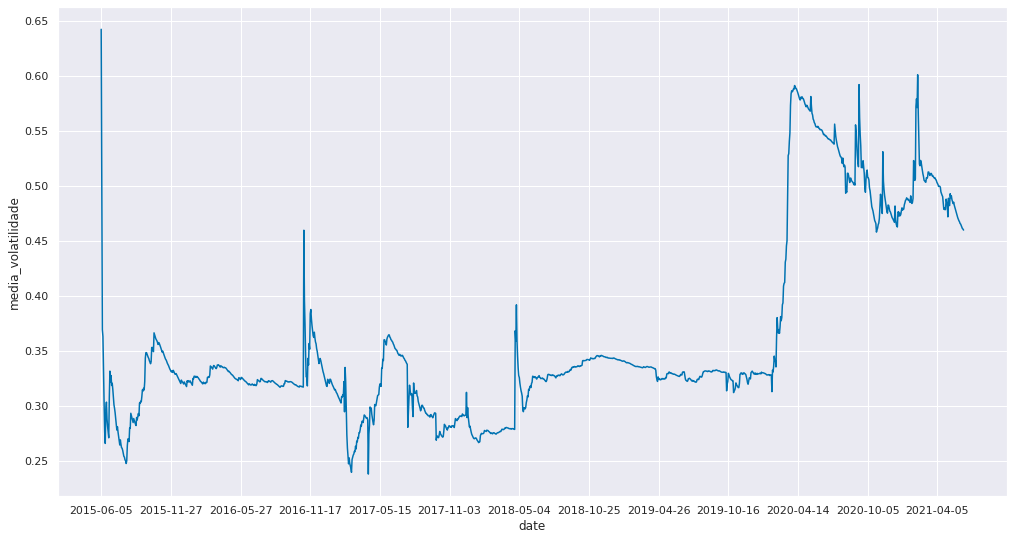

In [72]:
sns.set(rc={'figure.figsize':(17,9)})
sns.set_palette('colorblind')
loc = plticker.MultipleLocator(base=120.0)
axes = sns.lineplot( data=var_by_day_mean, x='date', y='media_volatilidade')
axes.xaxis.set_major_locator(loc)

In [37]:
var_by_day.iloc[400].std()

0.22627416997969416

In [ ]:
def volatility(period, df, df_detail, df_ticker = "codneg",
               open_name="preabe", closure_name="preult",
               dict_tickers = dict_tickers, set_year=0):
    
    all_volatility   = {}
    
    for ticker in dict_tickers:
        
        volatility_array = np.array([])
        volatility_array_nan = np.array([])
        
        price_fixing  = dict_tickers[ticker]
        open_price    = df [df [df_ticker] == ticker][open_name].reset_index(drop = True)
        closure_price = df [df [df_ticker] == ticker][closure_name].reset_index(drop = True)
        
        volatility_array = np.append(volatility_array, (closure_price.iloc[0] - price_fixing) / price_fixing)
        
        if period > 1:
        
            for t in range(1, period):

                try:
                    volatility_array = np.append(volatility_array, (closure_price.iloc[t] - open_price.iloc[t]) / open_price.iloc[t])
                    volatility_array_nan = np.append(volatility_array, (closure_price.iloc[t] - open_price.iloc[t]) / open_price.iloc[t])
                    
                except:
                    volatility_array = np.append(volatility_array_nan, np.nan)

        all_volatility[ticker] = (volatility_array.std()*mt.sqrt(252))
               
        
    return all_volatility

    

In [ ]:
def vol_df(datedf, df, df_detail, df_ticker = "codneg",
               open_name="preabe", closure_name="preult",
               dict_tickers = dict_tickers):
    
    vol_df = pd.DataFrame()
    
    for ticker in dict_tickers:
        
        array_rent = np.array([])
        array_vol = {}    
        
        for date in datedf:
            
            try:
                
                linha = df[df["date"] == date, df[df_ticker] == ticker]
                
                rentability = (linha[closure_price] - linha[open_price]) / linha[open_price]
                
                array_rent = np.append(array_rent, rentability)
                
                array_vol[date] = rentability.std()*mt.sqrt(252)
            
            except:
                array_vol[date] = np.nan
        
        vol_df[ticker] = pd.Series(array_vol)
        
    return vol_df
            

In [ ]:
x = vol_df(datedf, df, detail)